In [2]:
# K and N
# Logistic Regression

# Applying Classification Modeling

The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their credit card payment. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- NT is the abbreviation for New Taiwan. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked with your partner.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [2]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# more libraries here...

## 1. Data Cleaning

In [45]:
df = pd.read_csv('classification_lab_data.csv')

In [161]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

In [46]:
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,...,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,...,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,...,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,...,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,...,17653,17697,18068,1558,1278,1589,633,656,783,0
5,150000,2,1,1,46,0,0,0,0,0,...,24635,29032,29766,1382,1699,1200,5000,1214,1500,0
6,400000,2,2,2,41,-2,-2,-2,-2,-2,...,330,330,330,678,330,330,330,330,330,1
7,360000,2,2,2,31,0,-1,-1,-1,-2,...,1650,4350,4792,5964,1340,1650,4350,4792,40682,0
8,160000,2,2,2,32,2,2,2,2,-1,...,0,20818,20818,0,0,0,20818,0,0,0
9,500000,2,1,1,44,0,-1,-1,0,0,...,294969,189612,128459,72001,368199,6486,234,90,167116,0


In [26]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,...,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,...,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,...,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 24 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
EDUCATION                     23999 non-null int64
MARRIAGE                      23999 non-null int64
AGE                           23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
BILL_AMT1                     23999 non-null int64
BILL_AMT2                     23999 non-null int64
BILL_AMT3                     23999 non-null int64
BILL_AMT4                     23999 non-null int64
BILL_AMT5                     23999 non-null int64
BILL_AMT6                     23999 non-null int64
PAY_AMT1                

In [50]:
df = df.rename(index=str, columns={"PAY_0": "PAY_1", "default payment next month": "will_default"})

In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default'],
      dtype='object')

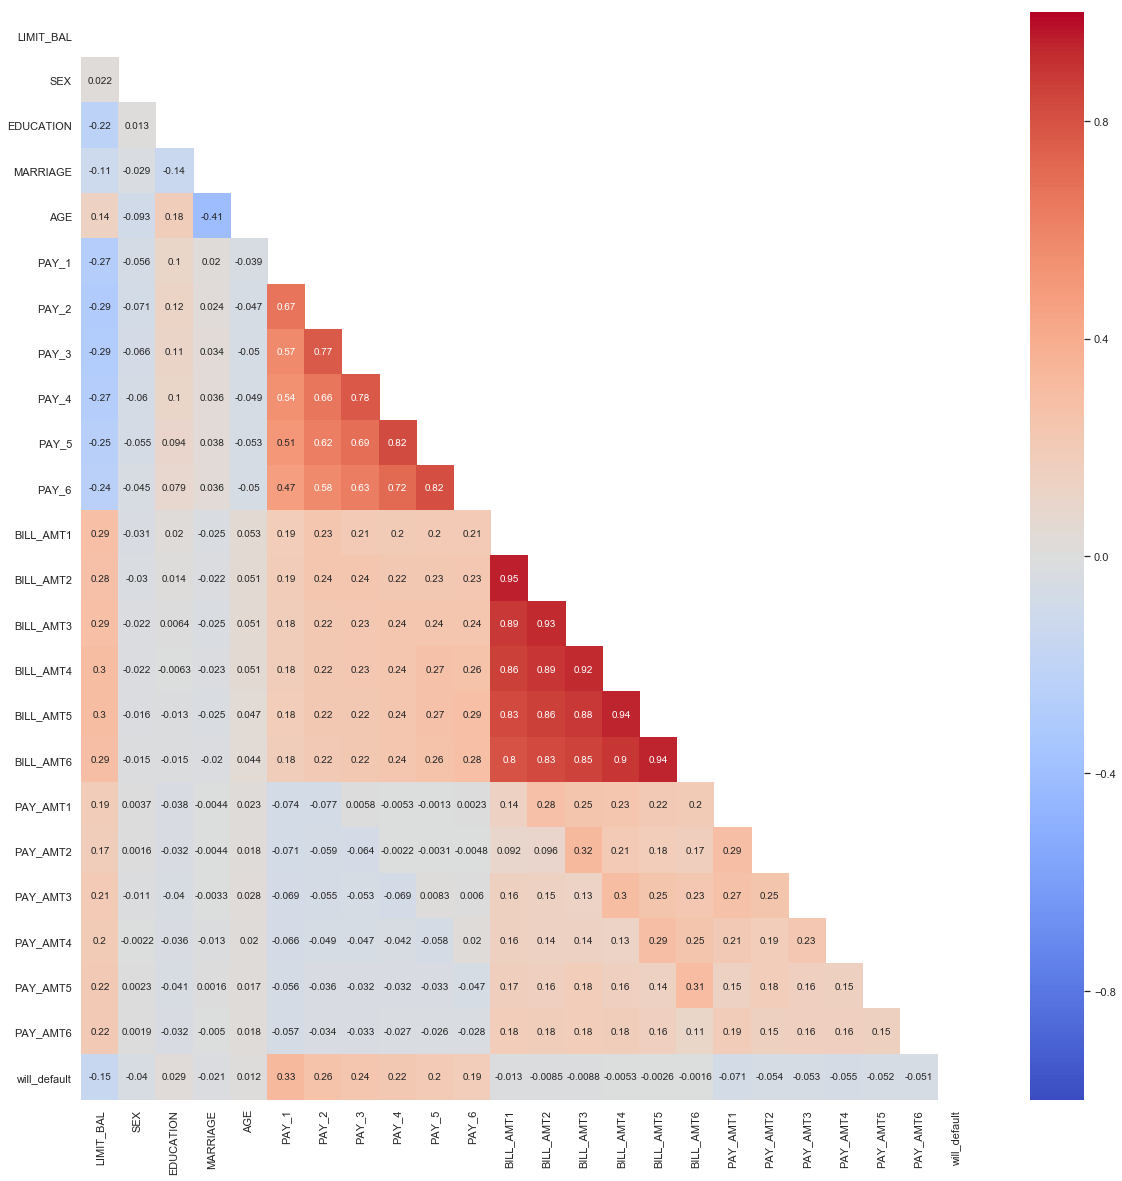

In [52]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [19]:
df.SEX.value_counts()

2    14486
1     9513
Name: SEX, dtype: int64

In [53]:
df.LIMIT_BAL.value_counts()

50000      2686
20000      1583
30000      1291
80000      1227
200000     1225
150000      906
100000      834
180000      803
360000      716
60000       656
230000      608
70000       596
130000      591
140000      591
500000      581
210000      579
120000      575
160000      554
90000       526
240000      495
110000      456
300000      450
170000      431
260000      413
10000       395
280000      389
220000      377
290000      283
250000      272
320000      248
           ... 
520000       18
550000       17
510000       16
600000       15
610000       10
560000        9
580000        9
620000        8
530000        8
700000        8
710000        6
630000        6
590000        5
540000        5
640000        5
570000        4
680000        3
720000        3
750000        3
670000        2
660000        2
730000        2
800000        2
16000         2
740000        2
650000        2
690000        1
1000000       1
780000        1
327680        1
Name: LIMIT_BAL, Length:

In [35]:
feature_list=list(set(df.columns)-{'default','default payment next month'})
feature_list

['PAY_4',
 'PAY_AMT1',
 'PAY_0',
 'PAY_AMT2',
 'AGE',
 'PAY_AMT6',
 'BILL_AMT4',
 'PAY_AMT5',
 'PAY_3',
 'PAY_6',
 'BILL_AMT5',
 'PAY_5',
 'BILL_AMT6',
 'PAY_AMT4',
 'SEX',
 'MARRIAGE',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT3',
 'LIMIT_BAL',
 'EDUCATION',
 'PAY_2',
 'BILL_AMT1']

In [73]:
df['PAY_AMT1']

0         2852
1         2007
2        30000
3         4000
4         1558
5         1382
6          678
7         5964
8            0
9        72001
10        2777
11           0
12       12000
13       10720
14        2100
15           0
16        2044
17        2182
18        9061
19        1700
20        2000
21        1900
22       10000
23           0
24        2876
25           0
26        3210
27        9000
28        1900
29        4080
         ...  
23969     1500
23970    53563
23971        0
23972        0
23973     2297
23974        0
23975     1998
23976    13855
23977     2161
23978      696
23979     2159
23980     2400
23981     5500
23982        0
23983     3173
23984        0
23985        0
23986        0
23987     8000
23988      399
23989        0
23990        0
23991     2000
23992     2500
23993    69803
23994     1500
23995     6000
23996     2682
23997     2572
23998     5000
Name: PAY_AMT1, Length: 23999, dtype: int64

Text(0.5, 1.0, 'Payment Status VS. Payment Amount')

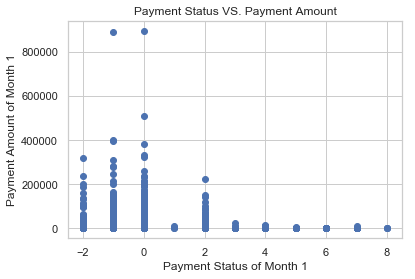

In [147]:
plt.scatter(df['PAY_3'], df['PAY_AMT3'])
plt.xlabel('Payment Status of Month 1')
plt.ylabel('Payment Amount of Month 1')
plt.title('Payment Status VS. Payment Amount')

In [80]:
df['PAY_1'].dtype

dtype('int64')

In [82]:
df['PAY_AMT1'].dtype

dtype('int64')

In [ ]:
import itertools
for feature1,feature2 in itertools.combinations(feature_list,2):
    var = feature2
    data = pd.concat([df[feature1], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(14, 6))
    fig = sns.boxplot(x=var, y=feature1, data=data)
    ax.set_title(feature2.title)
    fig.axis(ymin=min(df[feature1]), ymax=max([df.feature1]))

In [55]:
df.dtypes

LIMIT_BAL       int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
will_default    int64
dtype: object

In [135]:
sorted(df[(df['PAY_6'])&(df['will_default']== 1)]['PAY_6'])[1]

-1

## 2. EDA

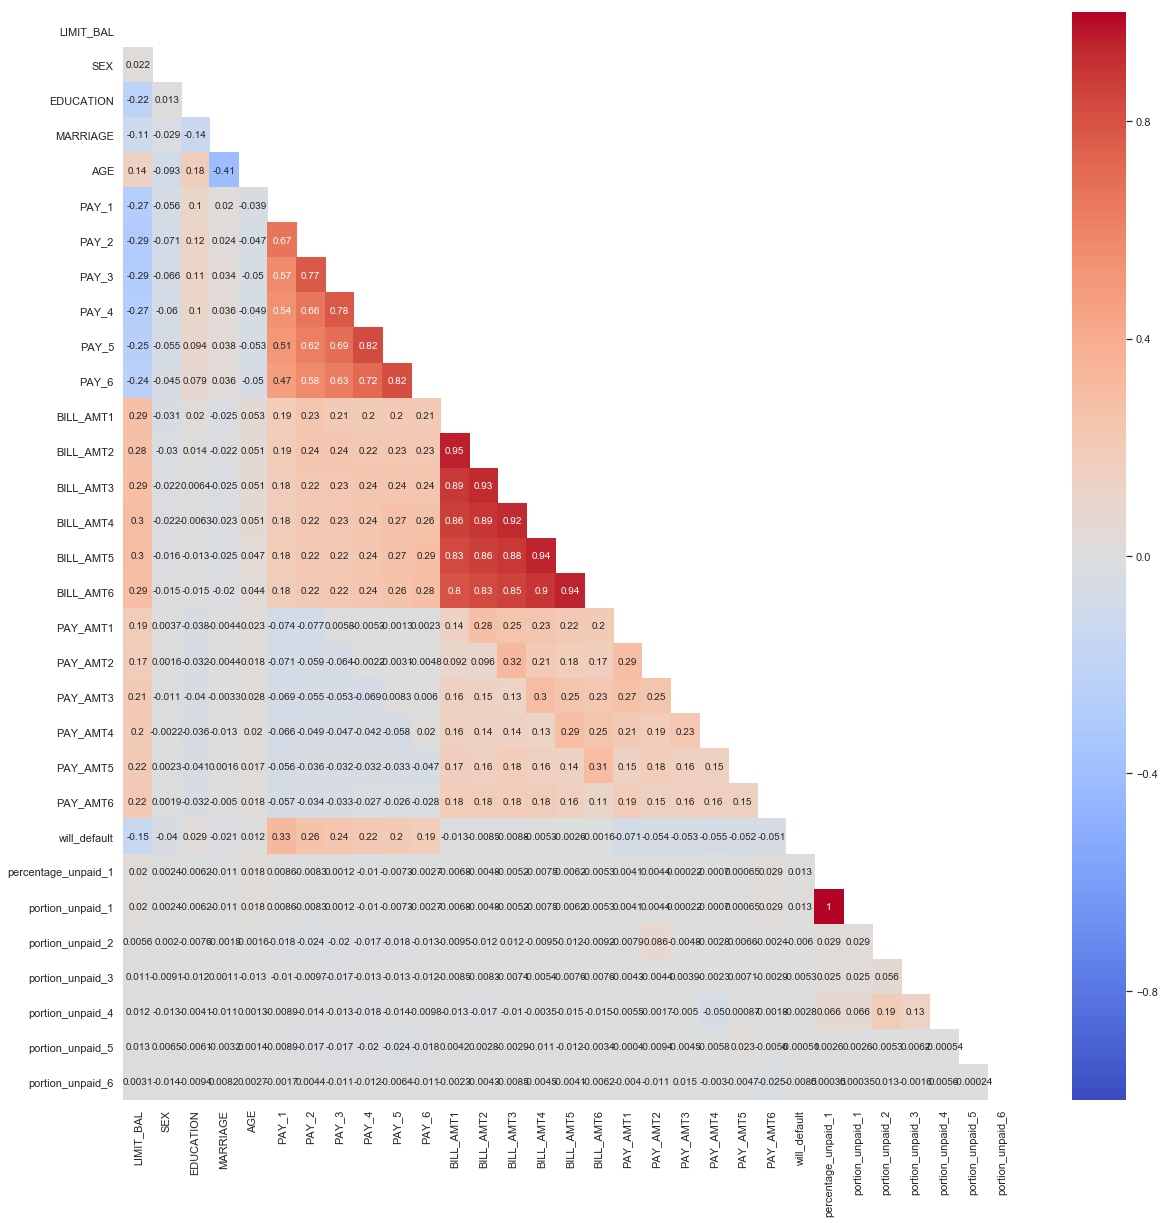

In [65]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [ ]:
df['payment_average'] = ['']

In [ ]:
df['payment_ratio'] = ['PAY_AMT6'] - ['PAY_AMT5']

In [143]:
df['will_default'].value_counts()

0    20244
1     3755
Name: will_default, dtype: int64

## 3. Feature Engineering

In [90]:
df['portion_unpaid_1'] = abs((df['BILL_AMT1'] - df['PAY_AMT1']) / df['BILL_AMT1'])
df['portion_unpaid_2'] = abs((df['BILL_AMT2'] - df['PAY_AMT2']) / df['BILL_AMT2'])
df['portion_unpaid_3'] = abs((df['BILL_AMT3'] - df['PAY_AMT3']) / df['BILL_AMT3'])
df['portion_unpaid_4'] = abs((df['BILL_AMT4'] - df['PAY_AMT4']) / df['BILL_AMT4'])
df['portion_unpaid_5'] = abs((df['BILL_AMT5'] - df['PAY_AMT5']) / df['BILL_AMT5'])
df['portion_unpaid_6'] = abs((df['BILL_AMT6'] - df['PAY_AMT6']) / df['BILL_AMT6'])

In [91]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,will_default,percentage_unpaid_1,portion_unpaid_1,portion_unpaid_2,portion_unpaid_3,portion_unpaid_4,portion_unpaid_5,portion_unpaid_6,avg_portion_unpaid
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,...,23999.000000,23999.000000,2.283400e+04,2.283400e+04,2.251000e+04,2.220800e+04,2.202300e+04,2.179400e+04,2.138600e+04,2.037600e+04
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,...,5245.642943,0.221176,-inf,inf,inf,inf,inf,inf,inf,-inf
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,...,17795.775322,0.415047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,-inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,125.000000,0.000000,7.003809e-01,8.614843e-01,8.727524e-01,8.957383e-01,9.068750e-01,9.006162e-01,8.999525e-01,0.000000e+00
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,0.000000,9.389001e-01,9.513732e-01,9.526038e-01,9.602551e-01,9.625660e-01,9.605610e-01,9.608652e-01,9.247670e-01
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4008.000000,0.000000,9.630170e-01,9.766786e-01,9.807061e-01,9.893615e-01,9.936866e-01,9.962237e-01,1.000000e+00,9.592094e-01
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,528666.000000,1.000000,3.543700e+04,inf,inf,inf,inf,inf,inf,5.905730e+03


In [67]:
df['avg_portion_unpaid'] = (df['portion_unpaid_1'] + df['portion_unpaid_2'] + df['portion_unpaid_3']+ df['portion_unpaid_4'] + df['portion_unpaid_5'] + df['portion_unpaid_6']) / 6

In [77]:
df['not_paying'] = df['PAY_1'] >=3

In [156]:
#Payment Ratio between months
df['first_month_ratio'] = abs((df['PAY_AMT6'] - df['PAY_AMT5']))/ abs(df['BILL_AMT5'])


In [157]:
df['second_month_ratio'] = abs((df['PAY_AMT5'] - df['PAY_AMT4']))/ abs(df['BILL_AMT4'])


In [158]:
df['third_month_ratio'] = abs((df['PAY_AMT4'] - df['PAY_AMT3']))/ abs(df['BILL_AMT3']) 


In [159]:
df['fourth_month_ratio'] = abs((df['PAY_AMT3'] - df['PAY_AMT2']))/ abs(df['BILL_AMT2']) 

In [160]:
df['fifth_month_ratio'] = abs((df['PAY_AMT2'] - df['PAY_AMT1']))/ abs(df['BILL_AMT1']) 

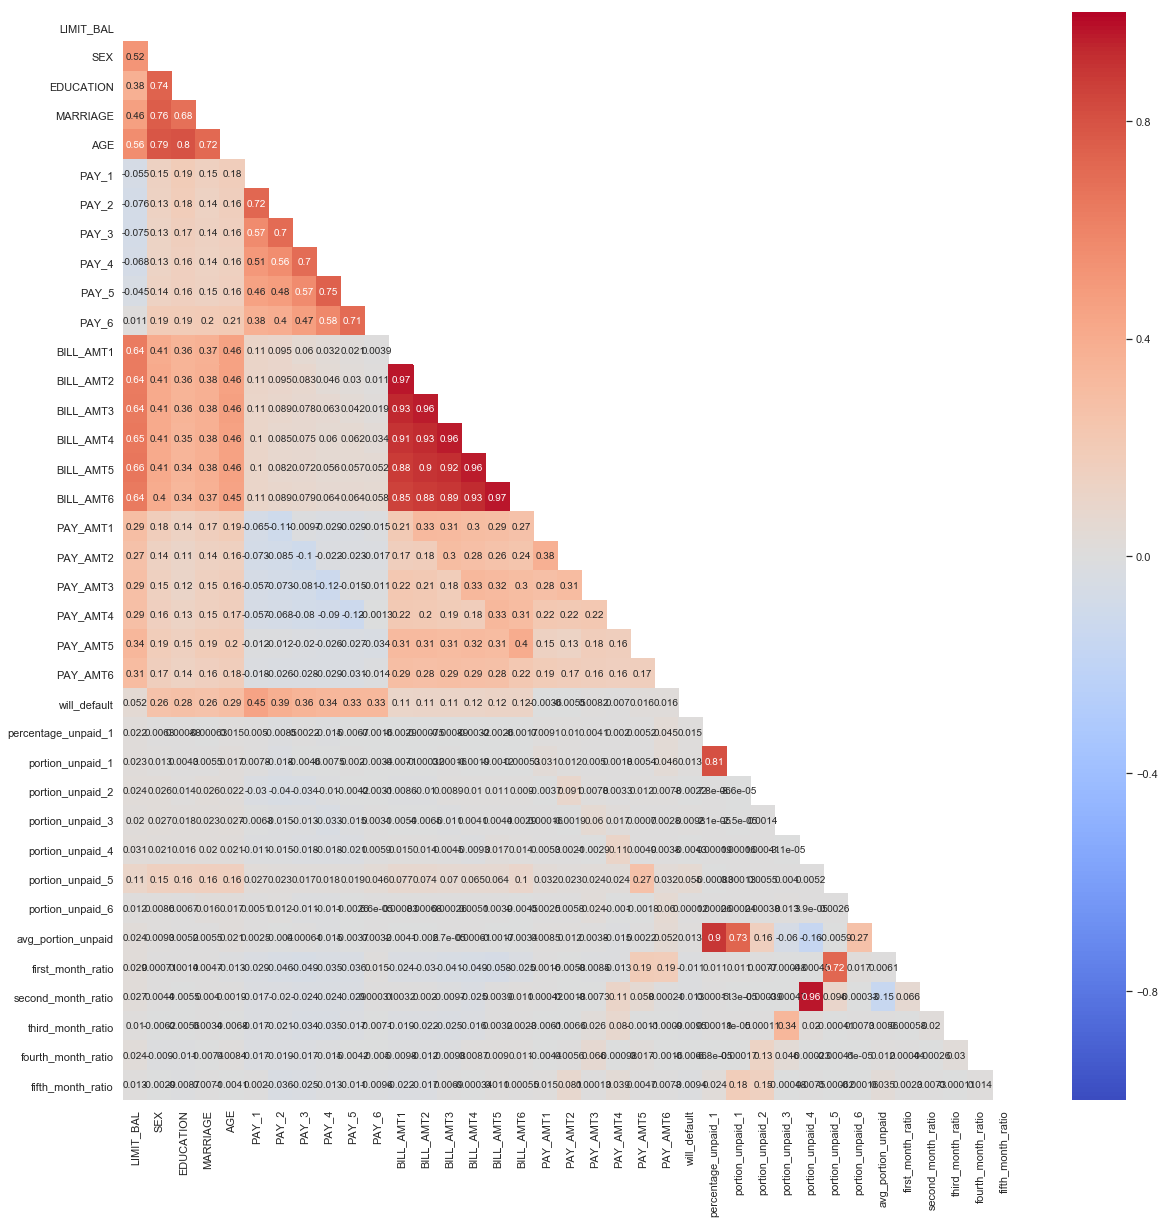

In [162]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [153]:
indices_to_inspect=[]
for index in df['BILL_AMT6'].index:
    if df['BILL_AMT6'][index]<0:
        indices_to_inspect.append(index)

In [164]:
len(df['BILL_AMT6'])

23999

In [163]:
len(indices_to_inspect)

91

In [ ]:
indices_to_inspect

In [155]:
df['negative_bill'] = indices_to_inspect.concatenate(dfpandas.DataFrame()

NameError: name 'pandas' is not defined

In [ ]:
# Payment Status Increase over time
df['PAY_6']

In [136]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'percentage_unpaid_1', 'portion_unpaid_1',
       'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4',
       'portion_unpaid_5', 'portion_unpaid_6', 'avg_portion_unpaid',
       'not_paying'],
      dtype='object')

In [138]:
#Lump together -2, -1, 0 payment status
df[df['PAY_6'] == -2] = 0

In [139]:
df[df['PAY_6'] == -1] = 0

In [141]:
df.PAY_6.value_counts()

0    21534
2     2211
3      146
4       42
7       39
6       14
5       11
8        2
Name: PAY_6, dtype: int64

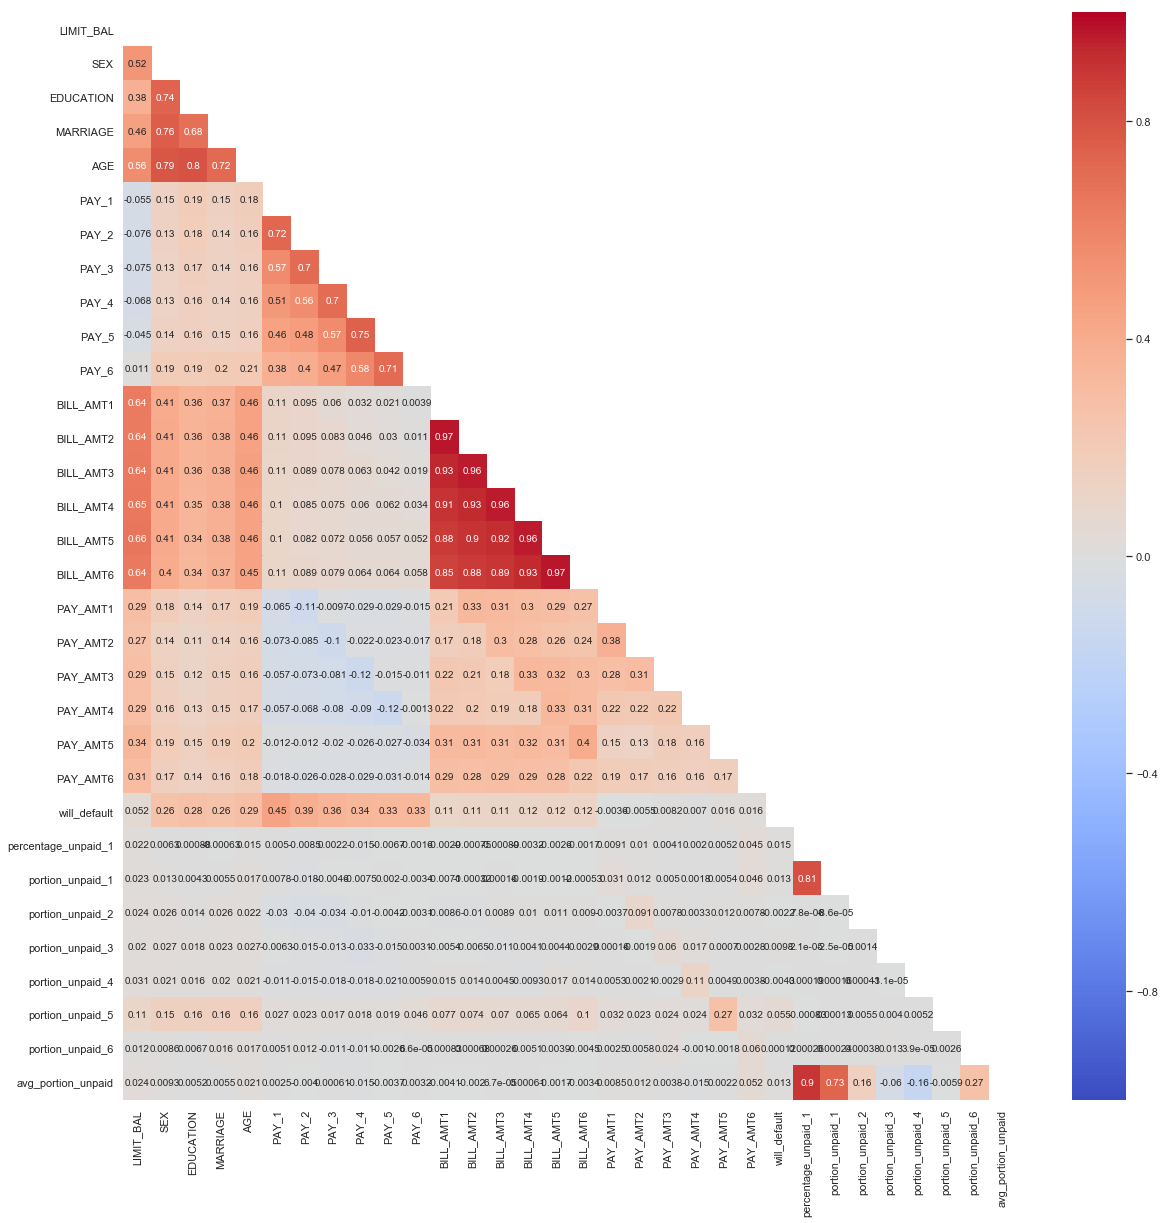

In [149]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [165]:
df['AVG_PAY_STATUS'] = (df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']) / 6

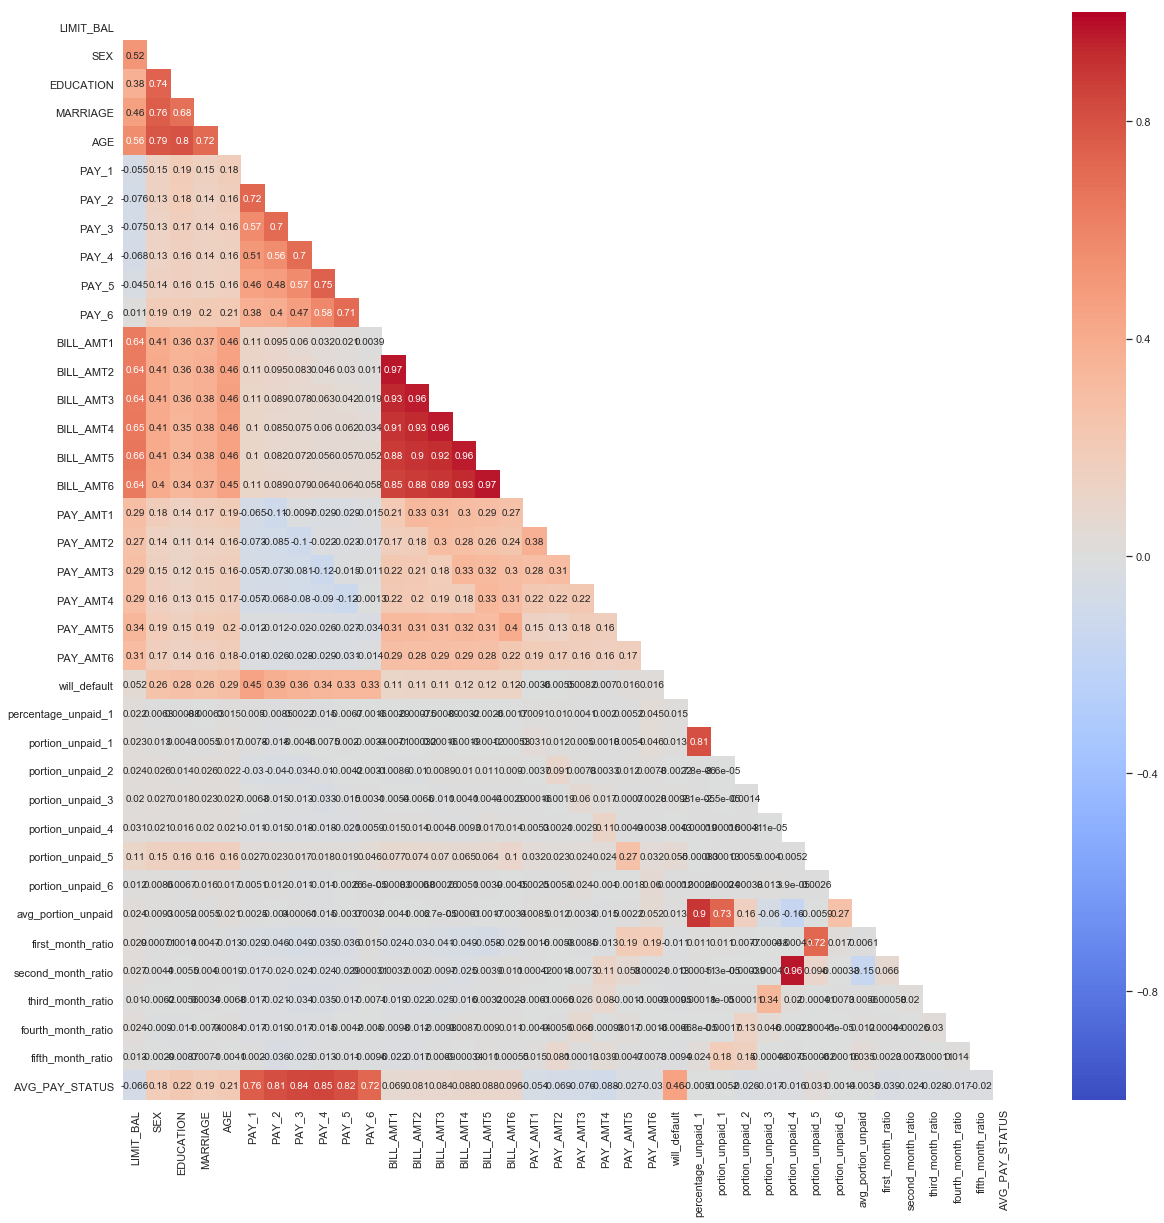

In [166]:
correlation = df.corr()
plt.figure(figsize=(20,20))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [167]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'will_default', 'percentage_unpaid_1', 'portion_unpaid_1',
       'portion_unpaid_2', 'portion_unpaid_3', 'portion_unpaid_4',
       'portion_unpaid_5', 'portion_unpaid_6', 'avg_portion_unpaid',
       'not_paying', 'first_month_ratio', 'second_month_ratio',
       'third_month_ratio', 'fourth_month_ratio', 'fifth_month_ratio',
       'AVG_PAY_STATUS'],
      dtype='object')

## 4. Feature Selection

In [ ]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Load data
default = df
X, y = shuffle(default.data, default.target, random_state=13)
# X = X.astype(np.float32)
offset = int(X.shape[0] * 0.8)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#Run Logistic Regression

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [ ]:
# Creating training sample
train_amt = int(0.8*len(df))
train_df = df.sample(train_amt)

In [ ]:
# Creating testing sample
test_amt = len(df) - train_amt
test_df = df.sample(test_amt)

## 6. Model Evaluation

## 7. Final Model